# Modeling Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from pydataset import data

from sklearn.cluster import KMeans

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')

In [3]:
#rename columns
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### a. Choose features other than the ones used in the lesson.

In [4]:
# define independent variables for k-means

X = iris[['petal_width', 'sepal_width']]
X.head(3)

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2


In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled.head()

,petal_width,sepal_width
1,-1.315444,1.019004
2,-1.315444,-0.131979
3,-1.315444,0.328414
4,-1.315444,0.098217
5,-1.315444,1.249201


In [7]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


In [8]:
# Cluster Centers aka centroids - THE OUTPUT IS SCALED (NOTE THIS FOR PLOTTING)

kmeans.cluster_centers_

array([[ 0.1941248 , -1.03317533],
       [-1.25634413,  0.90625492],
       [ 0.9710555 ,  0.07690277]])

In [9]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,0.194125,-1.033175
1,-1.256344,0.906255
2,0.971055,0.076903


In [10]:
# Centriods for unscaled data

centroids = iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,1.346809,2.608511
1,0.244898,3.451020
2,1.937037,3.090741


### b. Visualize the results of your clustering.

Text(0.5, 1.0, 'Clusters of Iris by Petal_Width and Sepal_Width (scaled)')

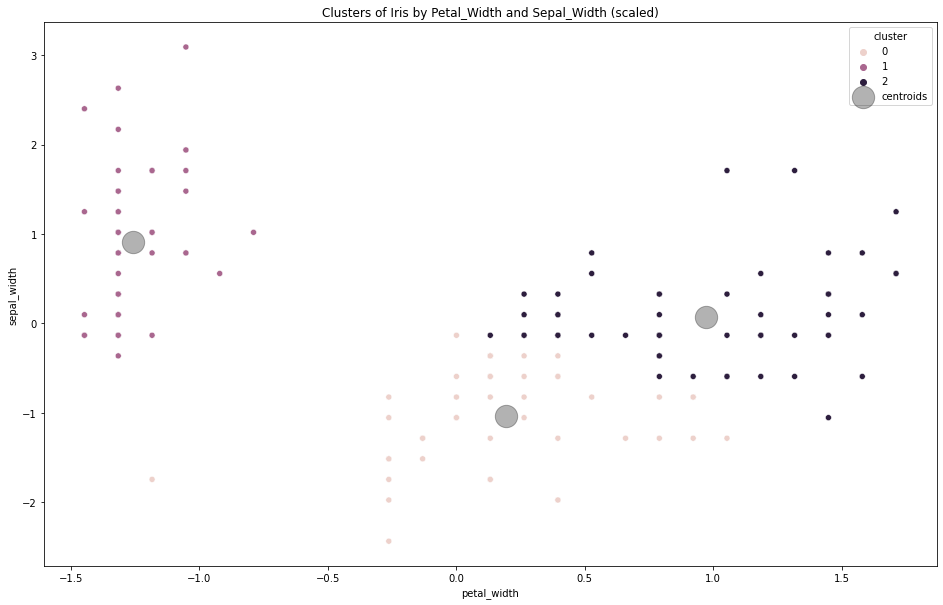

In [11]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='petal_width', y='sepal_width', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', ax=plt.gca(), color='k', alpha = 0.3, s = 500, marker = 'o', label = 'centroids')

plt.title('Clusters of Iris by Petal_Width and Sepal_Width (scaled)')

### c. Use the elbow method to visually select a good value for k.

In [12]:
#what is the inertia of this cluster?
kmeans.inertia_

79.23480116760695

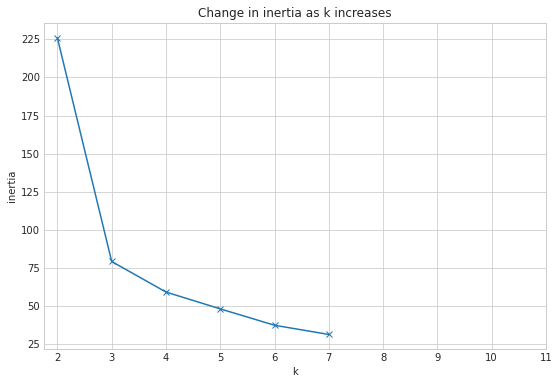

In [13]:
#visualize inertia vs k to select the best k:

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 8)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### d. Repeat the clustering, this time with 3 different features.

In [14]:
# define independent variables for k-means

X = iris[['petal_length', 'sepal_length', 'sepal_width']]

# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [15]:
# Cluster Centers

kmeans.cluster_centers_

array([[-1.30310821, -1.00206653,  0.90625492],
       [ 0.94857293,  1.08926809,  0.0406681 ],
       [ 0.29645938, -0.15389144, -0.94941289]])

In [16]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_length,sepal_length,sepal_width
0,-1.303108,-1.002067,0.906255
1,0.948573,1.089268,0.040668
2,0.296459,-0.153891,-0.949413


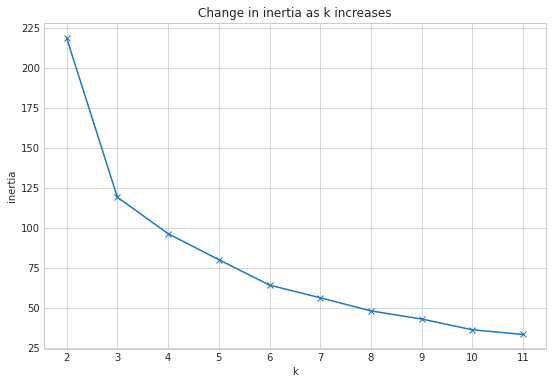

In [17]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Takeaways:
- With three features, I would lean towards a k=3 as the elbow is a bit more prominent than it was with only 2 features, where I may have chosen a k=4.

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [18]:
import wrangle_mall

In [19]:
#Acquire the mall data using the wrangle_mall module
mall = wrangle_mall.get_mall_data(cached=True)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
#Set the index to customer id 
mall = mall.set_index('customer_id')

In [21]:
# define independent variables for k-means

X = mall[['annual_income', 'age']]
X.head(3)

,annual_income,age
customer_id,,
1,15,19
2,15,21
3,16,20


In [22]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [23]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster in iris and X_scaled dataframe
mall['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

#check the returned dataframe
mall.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,3
3,Female,20,16,6,3
4,Female,23,16,77,3
5,Female,31,17,40,3


In [24]:
#Check on the scaled dataframe
X_scaled.head()

,annual_income,age,cluster
1,-1.738999,-1.424569,3
2,-1.738999,-1.281035,3
3,-1.700830,-1.352802,3
4,-1.700830,-1.137502,3
5,-1.662660,-0.563369,3


In [25]:
# View the centroids

kmeans.cluster_centers_

array([[ 1.47377619,  0.07022883],
       [-0.40624996,  1.21046483],
       [ 0.37817285, -0.64671048],
       [-1.17799735, -0.81371743]])

In [26]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,age
0,1.473776,0.070229
1,-0.406250,1.210465
2,0.378173,-0.646710
3,-1.177997,-0.813717


In [27]:
#Convert cluster type to a string for better viz with seaborn
mall['cluster'] = 'cluster_' + mall.cluster.astype(str)
mall.head()


,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,cluster_3
2,Male,21,15,81,cluster_3
3,Female,20,16,6,cluster_3
4,Female,23,16,77,cluster_3
5,Female,31,17,40,cluster_3


Text(0.5, 1.0, 'Clusters of Iris by Petal_Width and Sepal_Width (scaled)')

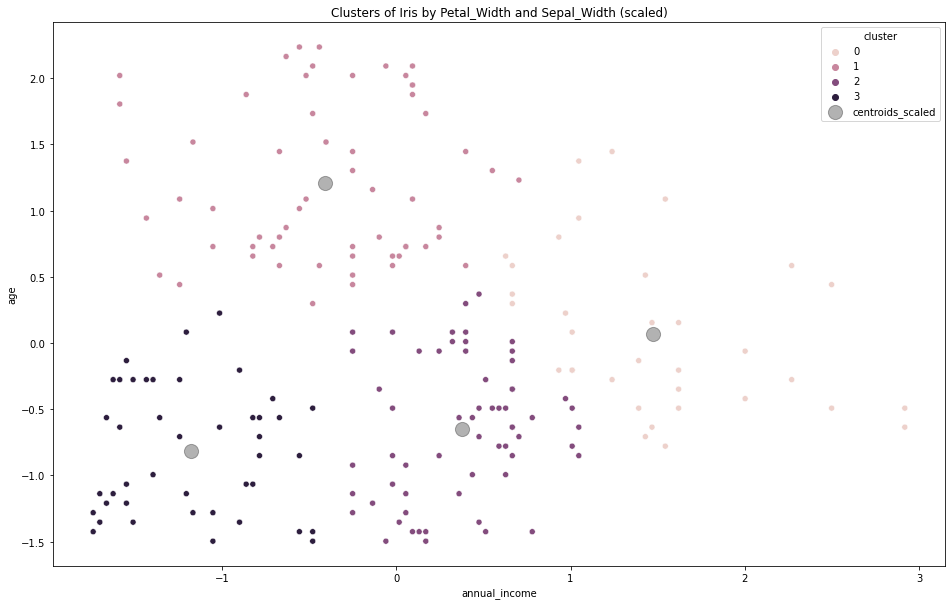

In [28]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='annual_income', y='age', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='annual_income', y='age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title('Clusters of Iris by Petal_Width and Sepal_Width (scaled)')

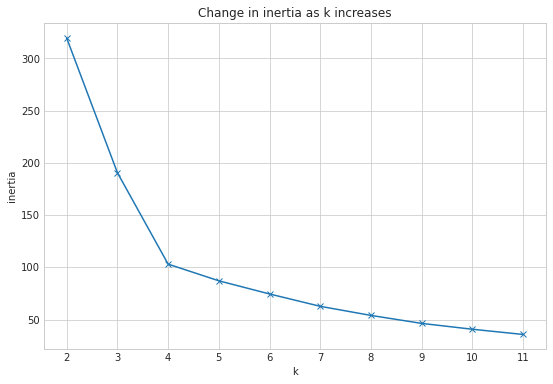

In [29]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

## 3. How does scaling impact the results of clustering?

**Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.**

In [32]:
# Useful functions provided by Ravinder: 


def create_cluster(train, X, k):
    # takes in train, X (dataframe with variables you want to cluster on) and k
    # It scales the X, calcuates the clusters and return train (with clusters), the Scaled dataframe,
    #the scaler and kmeans object and unscaled centroids as a dataframe
    scaler = StandardScaler(copy=True).fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns.values).set_index([X.index.values])
    kmeans = KMeans(n_clusters = k, random_state = 539)
    kmeans.fit(X_scaled)
    kmeans.predict(X_scaled)
    train['cluster'] = kmeans.predict(X_scaled)
    train['cluster'] = 'cluster_' + train.cluster.astype(str)
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    return train, X_scaled, scaler, kmeans, centroids


def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

### Visualize Clusters on unscaled data

In [30]:
X = mall[['spending_score', 'age']]

In [33]:
mall, X_scaled, scaler, kmeans, centroids = create_cluster(mall, X, 4)

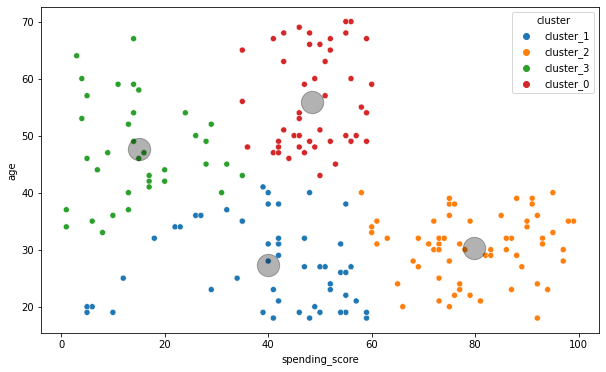

In [36]:
create_scatter_plot('spending_score','age',mall, kmeans, X_scaled, scaler)

### Visualize Clusters on Scaled Data

In [39]:
#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

# make a new column names cluster on X_scaled dataframe
X_scaled['cluster'] = kmeans.predict(X_scaled)

#check the returned dataframe
X_scaled.head()

,spending_score,age,cluster
1,-0.434801,-1.424569,2
2,1.195704,-1.281035,0
3,-1.715913,-1.352802,2
4,1.040418,-1.137502,0
5,-0.395980,-0.563369,2


In [41]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,spending_score,age
0,1.149715,-0.614157
1,-0.065584,1.229272
2,-0.394427,-0.834647
3,-1.366519,0.628336


Text(0.5, 1.0, "Clusters of Mall Customers' Spending Score By Age (scaled)")

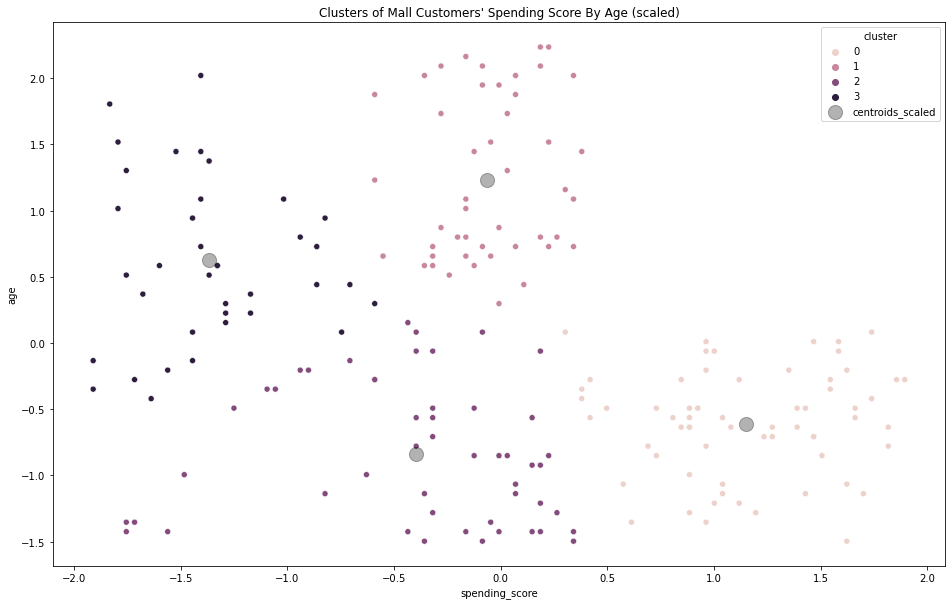

In [42]:
plt.figure(figsize=(16,10))

sns.scatterplot(x='spending_score', y='age', data=X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x= 'spending_score', y='age', ax=plt.gca(), color='k', alpha = 0.3, s = 200, marker = 'o', label = 'centroids_scaled')

plt.title("Clusters of Mall Customers' Spending Score By Age (scaled)")

[Text(0.5, 1.0, 'Unscaled Data with k= 3'),
 Text(0.5, 0, 'spending score'),
 Text(0, 0.5, 'age')]

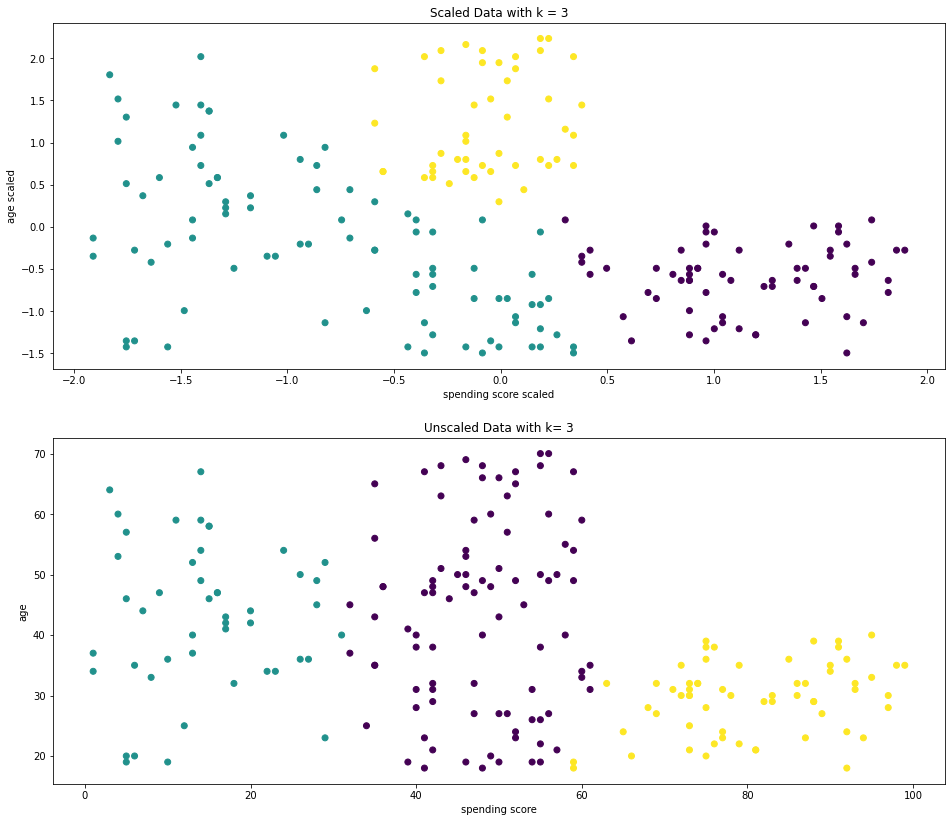

In [56]:
#Visualize scaled vs unscaled clustering in a subplot:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14), sharex=False, sharey=False)

#Plot the clusters based off scaled data
cluster1 = KMeans(k).fit(X_scaled).predict(X_scaled)
ax1.scatter(X_scaled.spending_score, X_scaled.age,c=cluster1)
ax1.set(title='Scaled Data with k = {}'.format(k), xlabel='spending score scaled', ylabel='age scaled')

#Plot the clusters based off unscaled data
cluster2 = KMeans(k).fit(X).predict(X)
ax2.scatter(mall.spending_score, mall.age, c=cluster2)
ax2.set(title='Unscaled Data with k= {}'.format(k), xlabel='spending score', ylabel='age')

#### Takeaways:
- Why is there a difference in the clusters between scaled and unscaled data?
    - Clustering is a distance based algorithm
    - Distance between points in scaled data is smaller than distance between points in unscaled data...this changes the results of the clustering.
    - So, scaling is important when the units of measures between two variables are different / extreme 